# Data preparation
## Unimodal
This stage has the purpose of preparing the dataset for model training, it consists on:
- Exploratory Data Analysis
- Feature engineering
- Export CSV for unimodal supervised and unsupervised approaches
- Data preparation
    - Merge based on sample dataset key
    - Group setup for LOGO CV
    - Feature scaling

## Setup

### Libraries

In [242]:
import os
import numpy as np
import pandas as pd  
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics, tree, svm, preprocessing
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
import seaborn as sns; sns.set()
from seaborn import heatmap

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Paths

In [243]:
input_path = '../../1_feature_extraction/output/'

input_path_kinship = '../../0_source_csv/kinship_matrix/'
input_path_residents = '../../0_source_csv/ensanut/'

output_path = '../output/'

# Global configuration path
glob_conf_path = '../../config/global_config_paper.py'

### Load local variables

In [244]:
exec(open(glob_conf_path).read())

## Exploratory Data Analysis

In [245]:
# Import dataset
unimodal = pd.read_csv(os.path.join(input_path, "unimodal_feature_extraction.csv"), skipinitialspace=True)

# See shape
unimodal.shape

(10303, 169)

In [246]:
unimodal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10303 entries, 0 to 10302
Columns: 169 entries, house_ID to kinship_nut_know_adult
dtypes: float64(134), int64(20), object(15)
memory usage: 13.3+ MB


In [247]:
# Percentages of null values
percent_missing = unimodal.isnull().mean()*100
missing_values = pd.DataFrame({'column_name':unimodal.columns, 
                               'percent_missing':percent_missing})
missing_values.sort_values('percent_missing', inplace=True, ascending=False)
missing_values.head(30)

column_name  percent_missing
product_A                          product_A        72.347860
product_B                          product_B        71.949917
product_C                          product_C        71.707270
ldl_chol_value                ldl_chol_value        45.578958
calories                            calories        38.571290
av_systolic_bp                av_systolic_bp        36.503931
av_dyastolic_bp              av_dyastolic_bp        36.503931
sodium_level                    sodium_level        35.678928
worked_hours                    worked_hours        33.475687
unhealthy_product          unhealthy_product        33.223333
av_waist                            av_waist        31.854800
nut_inf_decision            nut_inf_decision        31.078327
minutes_sitting              minutes_sitting        31.068621
days_walking                    days_walking        30.903620
days_moderate_phy_act  days_moderate_phy_act        30.874503
days_intense_phy_act    days_intense_phy_act        30.864797
fats_importance              fats_importance        30.660973
sugars_importance          sugars_importance        30.660973
sodium_importance          sodium_importance        30.660973
sat_fats_importance      sat_fats_importance        30.660973
energy_importance          energy_importance        30.660973
hba1c_value                      hba1c_value        29.991265
BMI_random_adult            BMI_random_adult        29.010968
hemoglobin_value            hemoglobin_value        28.690673
trig_value                        trig_value        28.642143
creatinine_value            creatinine_value        28.467437
glucose_value                  glucose_value        28.467437
albumin_value                  albumin_value        28.428613
hdl_chol_value                hdl_chol_value        28.428613
insulin_value                  insulin_value        28.428613

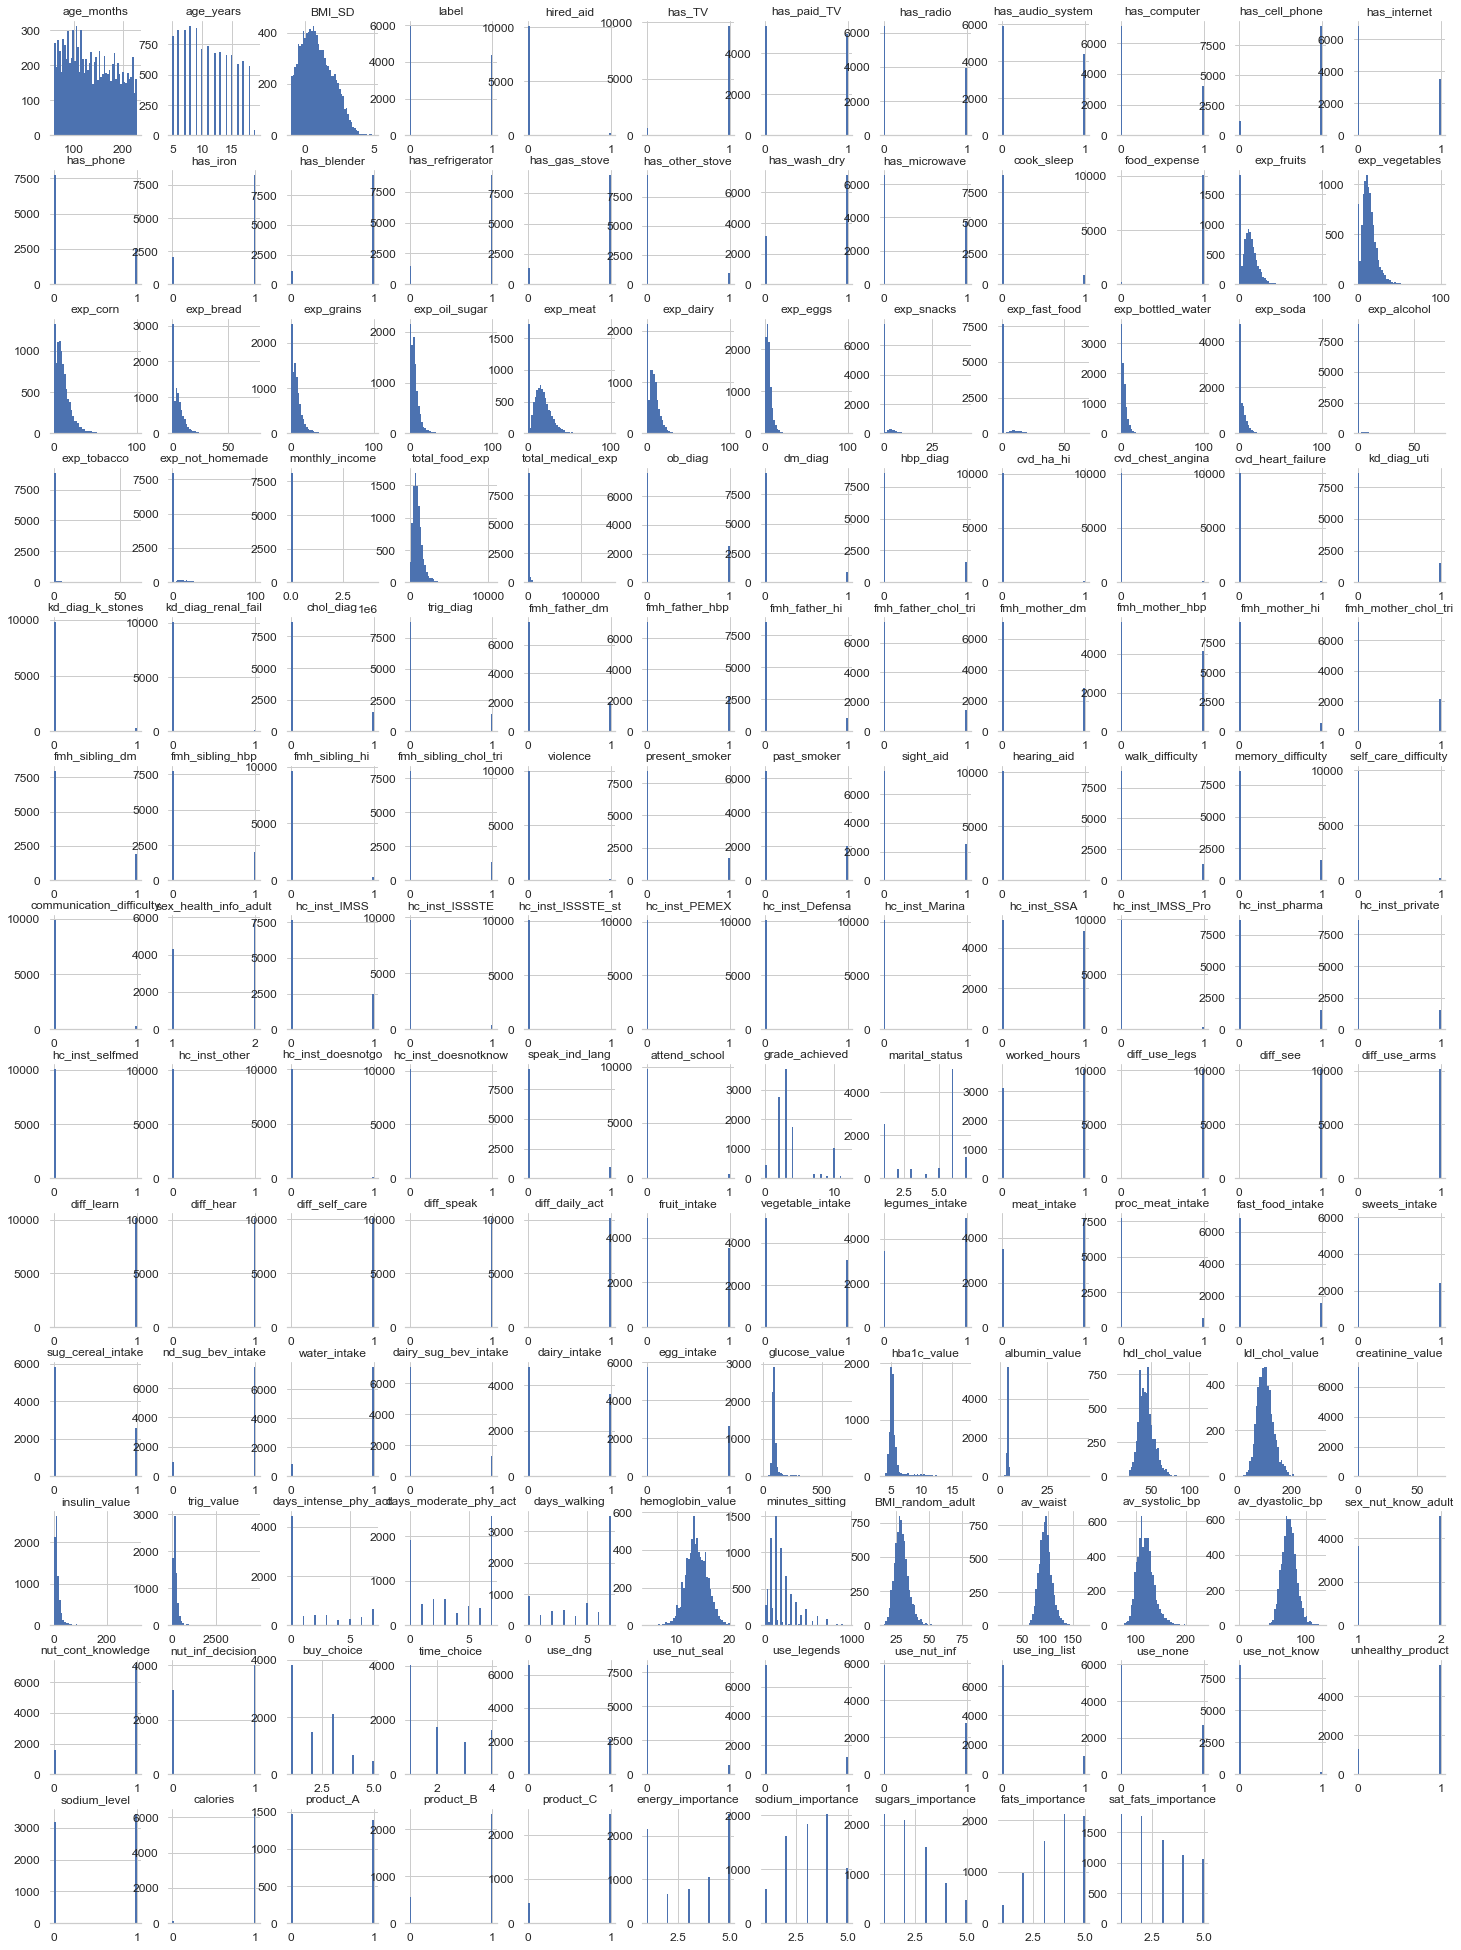

In [248]:
%matplotlib inline
import matplotlib.pyplot as plt
unimodal.hist(bins=50,figsize=(25,35))
plt.show()

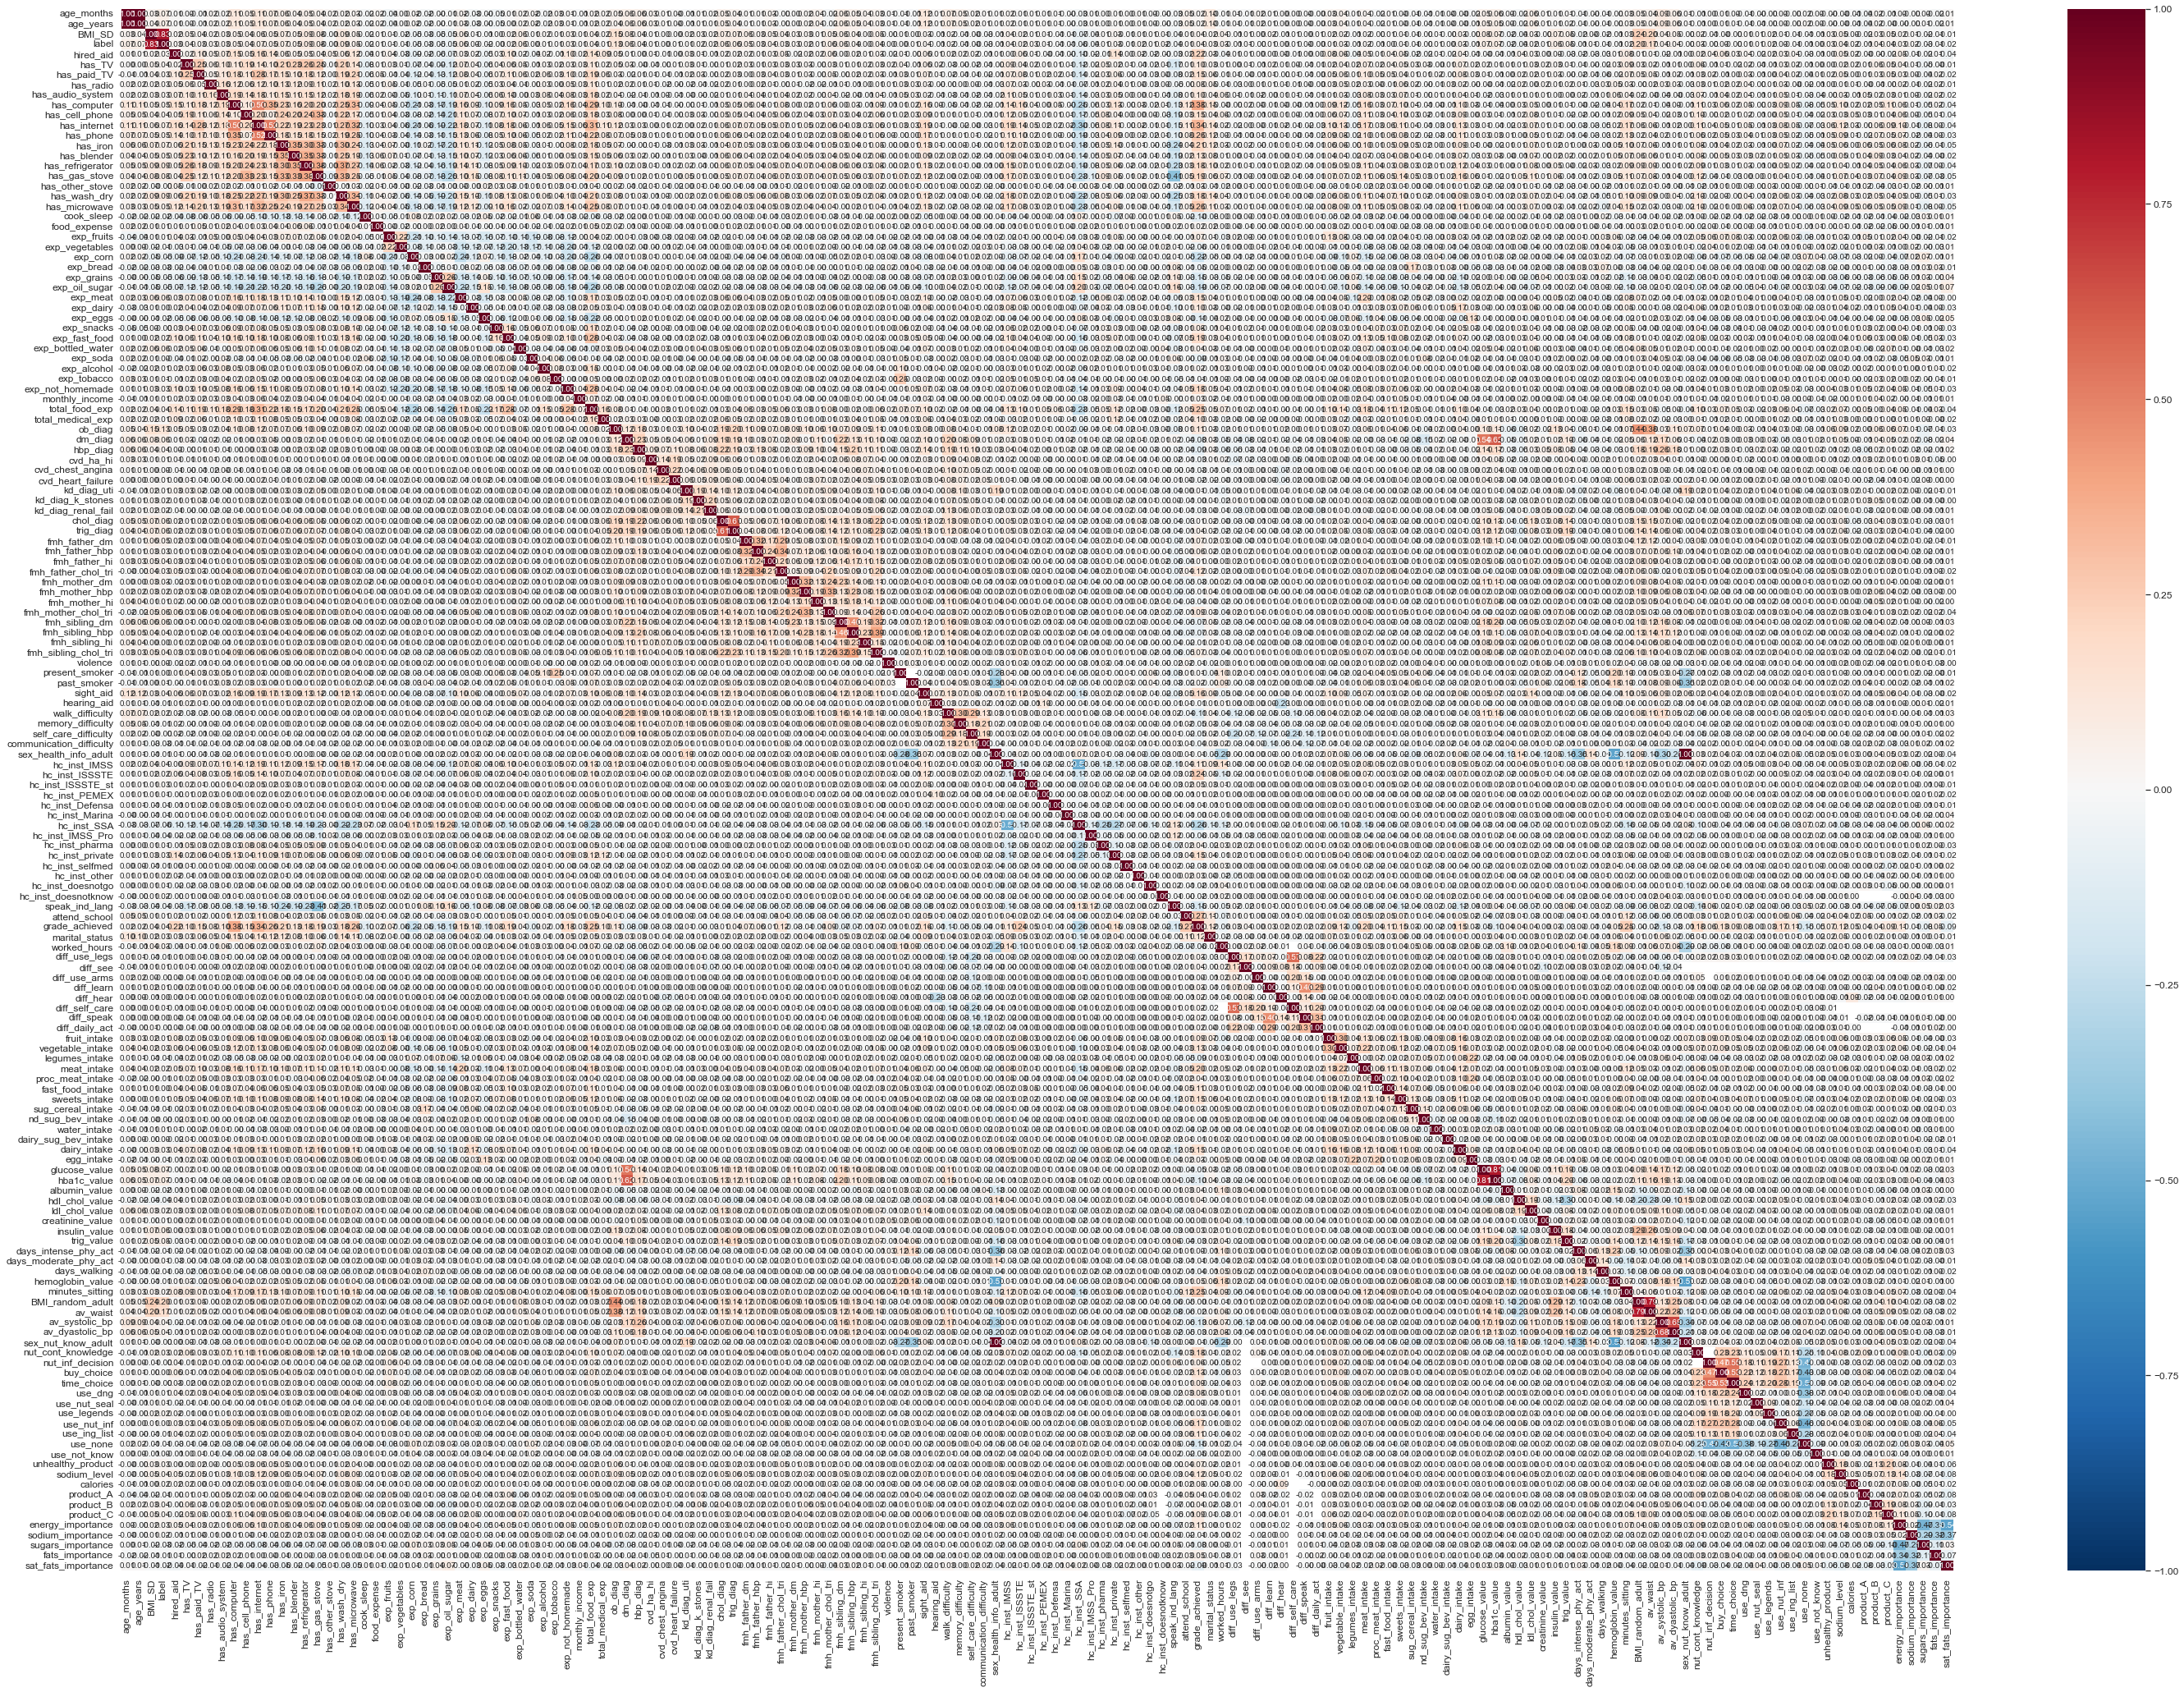

In [249]:
# Plot correlation matrix
fig, ax = plt.subplots(figsize=(50,35))
ax = heatmap(unimodal.corr(), fmt=".2f", annot=True, ax=ax, cmap="RdBu_r", vmin=-1, vmax=1)

### Check NaN values

### Experiments for dropping missing values

In [250]:
# Experiment 1: Drop all NaN
drop_all_nan = unimodal.dropna()
drop_all_nan.shape

(253, 169)

In [251]:
# Experiment 2: Drop column according to the 35% threshold and then remaining NaN
experiment2 = unimodal.copy()

percentage = 35.0
min_percentage = int(((100-percentage)/100)*experiment2.shape[0] + 1)
experiment2 = experiment2.dropna(axis=1,
                               thresh=min_percentage)
experiment2 = experiment2.dropna()

experiment2.shape

(1205, 161)

In [252]:
# Experiment 3: Drop column according to 46% threshold and then remaining NaN
# This could alow to keep the most variables about health information or biometrics
experiment3 = unimodal.copy()

percentage = 46.0
min_percentage = int(((100-percentage)/100)*experiment3.shape[0] + 1)
experiment3 = experiment3.dropna(axis=1,
                               thresh=min_percentage)
experiment3 = experiment3.dropna()

experiment3.shape

(688, 166)

In [253]:
# Experiment 4: Drop column according to 33% threshold and then remaining NaN
experiment4 = unimodal.copy()

percentage = 33.0
min_percentage = int(((100-percentage)/100)*experiment4.shape[0] + 1)
experiment4 = experiment4.dropna(axis=1,
                               thresh=min_percentage)
experiment4 = experiment4.dropna()

experiment4.shape 

(1821, 159)

In [254]:
# Experiment 5: Drop column according to 32% threshold and then remaining NaN
experiment5 = unimodal.copy()

percentage = 32.0
min_percentage = int(((100-percentage)/100)*experiment5.shape[0] + 1)
experiment5 = experiment5.dropna(axis=1,
                               thresh=min_percentage)
experiment5 = experiment5.dropna()

experiment5.shape 

(1821, 159)

In [255]:
# Experiment 6: Drop column according to 31% threshold and then remaining NaN
experiment6 = unimodal.copy()

percentage = 31.0
min_percentage = int(((100-percentage)/100)*experiment6.shape[0] + 1)
experiment6 = experiment6.dropna(axis=1,
                               thresh=min_percentage)
experiment6 = experiment6.dropna()

experiment6.shape 

(2114, 156)

In [256]:
# Experiment 7: Drop column according to 30% threshold and then remaining NaN
experiment7 = unimodal.copy()

percentage = 30.0
min_percentage = int(((100-percentage)/100)*experiment7.shape[0] + 1)
experiment7 = experiment7.dropna(axis=1,
                               thresh=min_percentage)
experiment7 = experiment7.dropna()

experiment7.shape 

(2467, 148)

Since the size of n when dropping the columns with more than 35% missing values results in less than the minimum acceptable n=2,344, a lower threshold of 30% is going to be applied to drop the NaN values. 

Drop all columns with more than 30% of missing values. 

In [257]:
percentage = 30.0
min_percentage = int(((100-percentage)/100)*unimodal.shape[0] + 1)
unimodal = unimodal.dropna(axis=1,
                               thresh=min_percentage)
unimodal.shape

(10303, 148)

In [258]:
# Drop all rows with at least one NaN value.
unimodal = unimodal.dropna()
unimodal.shape

(2467, 148)

### Check label distribution

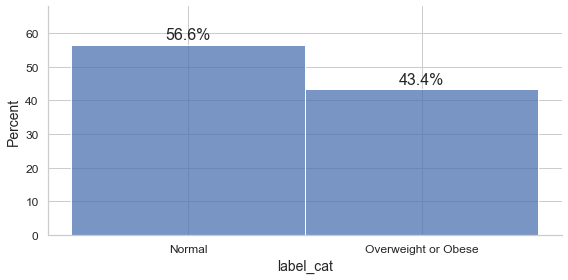

In [259]:
binary_SD_dist = sns.displot(data=unimodal, x="label_cat", 
                       height=4, aspect=2, stat="percent")

show_label_percent(binary_SD_dist)

plt.show()

## Group setup for LOGO CV

### Create random groups for the Leave-One-Group-Out Cross-Validation

In [260]:
# Reset index
unimodal.reset_index(drop=True, inplace=True)

# Create fair random groups from 1 to 5 as a numpy array and convert it into DataFrame
random_groups = np.random.uniform(1,6,size=len(unimodal))
random_groups = pd.DataFrame(random_groups.astype(int))

# Assign group dataframe into column "group"
unimodal["group"] = random_groups
unimodal

house_ID household_ID    person_ID  region      strata locality_type  \
0         1_4        1_4_1      1_4_1_8  Centre  3rd_strata         urban   
1         3_2        3_2_1      3_2_1_5  Centre  2nd_strata         urban   
2         6_4        6_4_1      6_4_1_3  Centre  2nd_strata         urban   
3         8_1        8_1_1      8_1_1_3  Centre  3rd_strata         urban   
4         8_1        8_1_1      8_1_1_5  Centre  3rd_strata         urban   
...       ...          ...          ...     ...         ...           ...   
2462   3933_3     3933_3_1   3933_3_1_2  Centre  1st_strata         rural   
2463   3936_5     3936_5_1   3936_5_1_3  Centre  2nd_strata         rural   
2464   3936_5     3936_5_1   3936_5_1_6  Centre  2nd_strata         rural   
2465  3937_16    3937_16_1  3937_16_1_3  Centre  2nd_strata         rural   
2466  3937_16    3937_16_1  3937_16_1_4  Centre  2nd_strata         rural   

     locality_size  age_months  age_years     sex  ...  time_choice use_dng  \
0         >100,000         122         10  female  ...          2.0     0.0   
1         >100,000         149         12  female  ...          1.0     0.0   
2         >100,000          78          6  female  ...          2.0     0.0   
3         >100,000         185         15  female  ...          1.0     0.0   
4         >100,000         113          9    male  ...          1.0     0.0   
...            ...         ...        ...     ...  ...          ...     ...   
2462        <2,500         162         13    male  ...          1.0     0.0   
2463        <2,500         193         16    male  ...          3.0     1.0   
2464        <2,500          70          5    male  ...          3.0     1.0   
2465        <2,500         177         14  female  ...          1.0     0.0   
2466        <2,500         116          9  female  ...          1.0     0.0   

      use_nut_seal  use_legends  use_nut_inf  use_ing_list  use_none  \
0              0.0          0.0          0.0           1.0       0.0   
1              0.0          0.0          1.0           0.0       0.0   
2              0.0          0.0          1.0           0.0       0.0   
3              0.0          0.0          0.0           0.0       1.0   
4              0.0          0.0          0.0           0.0       1.0   
...            ...          ...          ...           ...       ...   
2462           0.0          0.0          0.0           0.0       1.0   
2463           0.0          0.0          1.0           0.0       0.0   
2464           0.0          0.0          1.0           0.0       0.0   
2465           0.0          0.0          0.0           0.0       0.0   
2466           0.0          0.0          0.0           0.0       0.0   

      use_not_know  kinship_nut_know_adult  group  
0              0.0    Parent or uncle/aunt      2  
1              0.0             Grandparent      1  
2              0.0                  Parent      5  
3              0.0                  Parent      4  
4              0.0                  Parent      2  
...            ...                     ...    ...  
2462           0.0                  Parent      1  
2463           0.0                  Parent      3  
2464           0.0                  Parent      3  
2465           1.0                  Parent      2  
2466           1.0                  Parent      1  

[2467 rows x 149 columns]

In [261]:
# Verify size, NaN and Dtype of everything
unimodal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Columns: 149 entries, house_ID to group
dtypes: float64(113), int32(1), int64(20), object(15)
memory usage: 2.8+ MB


### Check group representation

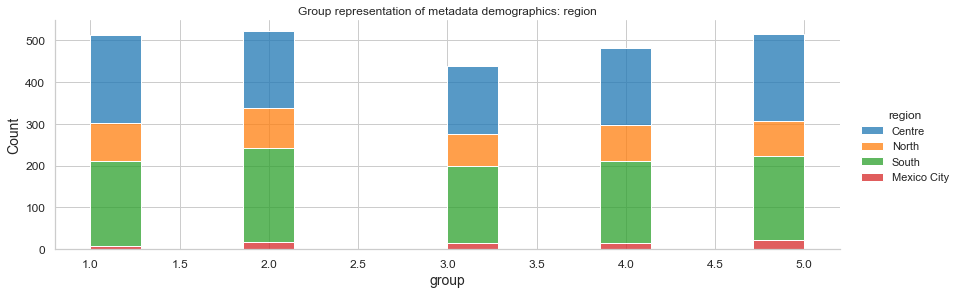

In [262]:
# Plot distributions to see representation of demographics in the groups
group_region = sns.displot(data=unimodal, x="group", hue="region", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: region""")
plt.show(group_region)

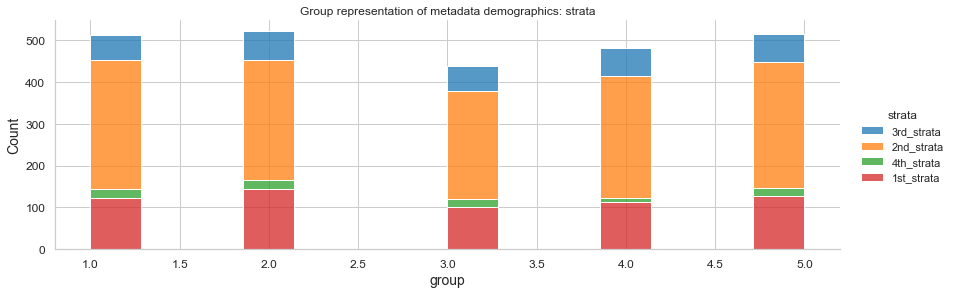

In [263]:
group_strata = sns.displot(data=unimodal, x="group", hue="strata", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: strata""")

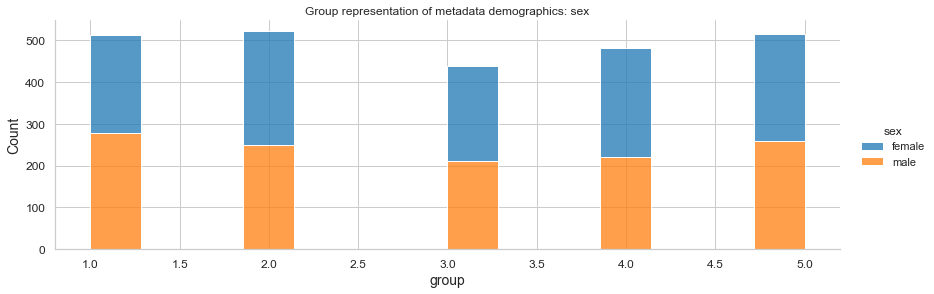

In [264]:
group_sex = sns.displot(data=unimodal, x="group", hue="sex", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: sex""")
plt.show(group_sex)

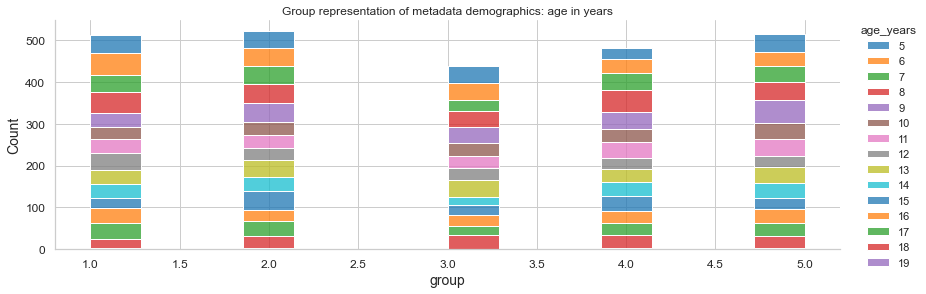

In [265]:
group_age_years = sns.displot(data=unimodal, x="group", hue="age_years", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: age in years""")

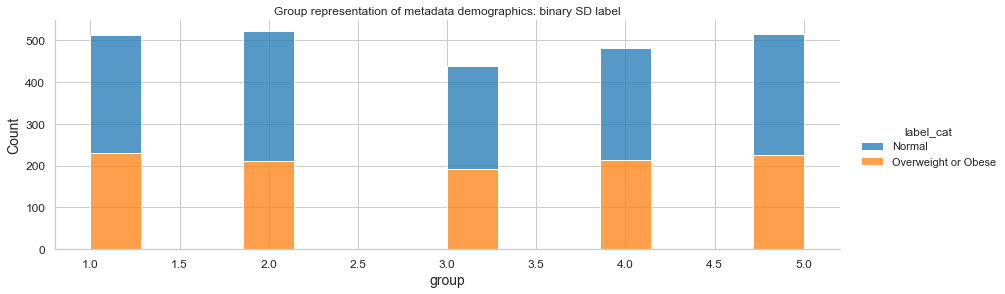

In [266]:
group_binary_SD_label = sns.displot(data=unimodal, x="group", hue="label_cat", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: binary SD label""")
plt.show(group_binary_SD_label)

### Remove metadata

In [267]:
# Remove unnecesary metadata
unimodal = unimodal.drop(columns=["house_ID","household_ID","person_ID",
                                  "age_months","label_cat"])
unimodal.columns.tolist()

['region',
 'strata',
 'locality_type',
 'locality_size',
 'age_years',
 'sex',
 'BMI_SD',
 'label',
 'hired_aid',
 'has_TV',
 'has_paid_TV',
 'has_radio',
 'has_audio_system',
 'has_computer',
 'has_cell_phone',
 'has_internet',
 'has_phone',
 'has_iron',
 'has_blender',
 'has_refrigerator',
 'has_gas_stove',
 'has_other_stove',
 'has_wash_dry',
 'has_microwave',
 'cook_sleep',
 'food_expense',
 'cooking_room',
 'result_elcsa',
 'exp_fruits',
 'exp_vegetables',
 'exp_corn',
 'exp_bread',
 'exp_grains',
 'exp_oil_sugar',
 'exp_meat',
 'exp_dairy',
 'exp_eggs',
 'exp_snacks',
 'exp_fast_food',
 'exp_bottled_water',
 'exp_soda',
 'exp_alcohol',
 'exp_tobacco',
 'exp_not_homemade',
 'monthly_income',
 'total_food_exp',
 'total_medical_exp',
 'ob_diag',
 'dm_diag',
 'hbp_diag',
 'cvd_ha_hi',
 'cvd_chest_angina',
 'cvd_heart_failure',
 'kd_diag_uti',
 'kd_diag_k_stones',
 'kd_diag_renal_fail',
 'chol_diag',
 'trig_diag',
 'fmh_father_dm',
 'fmh_father_hbp',
 'fmh_father_hi',
 'fmh_father_ch

## Feature encoding or scaling
Three different preparations derived after this point:
- Numericals only: for the Mean Square Error technique for dimensionality reduction and the unsupervised exploratory using TensorFlow
- Categoricals only: for the unsupervised exploratory using TensorFlow
- Multimodal: for Early Fusion and Unsupervised approaches

### Create dummy variables of categorical features

In [268]:
# Identify categorical variables
unimodal.select_dtypes(include='object')

region      strata locality_type locality_size     sex cooking_room  \
0     Centre  3rd_strata         urban      >100,000  female      kitchen   
1     Centre  2nd_strata         urban      >100,000  female      kitchen   
2     Centre  2nd_strata         urban      >100,000  female      kitchen   
3     Centre  3rd_strata         urban      >100,000  female      kitchen   
4     Centre  3rd_strata         urban      >100,000    male      kitchen   
...      ...         ...           ...           ...     ...          ...   
2462  Centre  1st_strata         rural        <2,500    male      kitchen   
2463  Centre  2nd_strata         rural        <2,500    male      kitchen   
2464  Centre  2nd_strata         rural        <2,500    male      kitchen   
2465  Centre  2nd_strata         rural        <2,500  female      kitchen   
2466  Centre  2nd_strata         rural        <2,500  female      kitchen   

     result_elcsa kinship_health_info_adult age_group_health_info_adult  \
0     Food safety      Parent or uncle/aunt                       30-39   
1     Food safety               Grandparent                       60-69   
2     Food safety                    Parent                       20-29   
3     Food safety                    Parent                       30-39   
4     Food safety                    Parent                       30-39   
...           ...                       ...                         ...   
2462  Food safety                    Parent                       40-49   
2463  Food safety                    Parent                       40-49   
2464  Food safety                    Parent                       40-49   
2465  Food safety                    Parent                       30-39   
2466  Food safety                    Parent                       30-39   

     age_nut_know_adult kinship_nut_know_adult  
0                 30-39   Parent or uncle/aunt  
1                 60-69            Grandparent  
2                 20-29                 Parent  
3                 30-39                 Parent  
4                 30-39                 Parent  
...                 ...                    ...  
2462              40-49                 Parent  
2463              40-49                 Parent  
2464              40-49                 Parent  
2465              30-39                 Parent  
2466              30-39                 Parent  

[2467 rows x 11 columns]

Categorical values:
- kinship_health_info_adult
- kinship_nut_know_adult
- age_health_info_adult
- age_nut_know_adult
- region
- strata
- locality_type
- locality_size
- buy_choice
- time_choice
- cooking_room
- result_elcsa
- marital_status
- grade_achieved
- sex_health_info_adult
- sex_nut_know_adult

To improve readibility of the dummy variables, the answers will be changed into categorical.

In [269]:
unimodal["marital_status"] = unimodal["marital_status"].replace([1,2,3,4,5,6,7],["free_union",
                                                                                    "separated_free_union",
                                                                                    "separated_marriage",
                                                                                    "divorced",
                                                                                    "widowed",
                                                                                    "married",
                                                                                    "single"])

unimodal["grade_achieved"] = unimodal["grade_achieved"].replace([0,1,2,3,4,5,6,7,8,9,10,11,12],["none",
                                                                                    "pre-school",
                                                                                    "primaria",
                                                                                    "secundaria",
                                                                                    "preparatoria",
                                                                                    "normal_basica",
                                                                                    "tec_com_studies_primaria",
                                                                                    "tec_com_studies_secundaria",
                                                                                    "tec_com_studies_preparatoria",
                                                                                    "normal_licenciatura",
                                                                                    "bachellors",
                                                                                    "masters",
                                                                                    "doctorate"])

unimodal["sex_health_info_adult"] = unimodal["sex_health_info_adult"].replace([1,2],["male","female"])

unimodal["buy_choice"] = unimodal["buy_choice"].replace([1.0,2.0,3.0,4.0,5.0],["never",
                                                                         "almost never",
                                                                         "sometimes",
                                                                         "almost always",
                                                                         "always"])

unimodal["time_choice"] = unimodal["time_choice"].replace([1.0,2.0,3.0,4.0],["Does not see it",
                                                                           "Less than 30 seconds",
                                                                           "From 30 to 60 seconds",
                                                                           "More than a minute"])

unimodal["strata"] = unimodal["strata"].replace([1,2,3,4],["1st_strata",
                                                               "2nd_strata",
                                                               "3rd_strata",
                                                               "4th_strata"])

unimodal["sex_nut_know_adult"] = unimodal["sex_nut_know_adult"].replace([1,2],["male","female"])

In [270]:
unimodal.select_dtypes(include='object')

region      strata locality_type locality_size     sex cooking_room  \
0     Centre  3rd_strata         urban      >100,000  female      kitchen   
1     Centre  2nd_strata         urban      >100,000  female      kitchen   
2     Centre  2nd_strata         urban      >100,000  female      kitchen   
3     Centre  3rd_strata         urban      >100,000  female      kitchen   
4     Centre  3rd_strata         urban      >100,000    male      kitchen   
...      ...         ...           ...           ...     ...          ...   
2462  Centre  1st_strata         rural        <2,500    male      kitchen   
2463  Centre  2nd_strata         rural        <2,500    male      kitchen   
2464  Centre  2nd_strata         rural        <2,500    male      kitchen   
2465  Centre  2nd_strata         rural        <2,500  female      kitchen   
2466  Centre  2nd_strata         rural        <2,500  female      kitchen   

     result_elcsa sex_health_info_adult grade_achieved      marital_status  \
0     Food safety                female   preparatoria  separated_marriage   
1     Food safety                female     secundaria            divorced   
2     Food safety                female     secundaria             married   
3     Food safety                  male     secundaria             married   
4     Food safety                  male     secundaria             married   
...           ...                   ...            ...                 ...   
2462  Food safety                female     secundaria             married   
2463  Food safety                female     secundaria             married   
2464  Food safety                female     secundaria             married   
2465  Food safety                female     secundaria             married   
2466  Food safety                female     secundaria             married   

     kinship_health_info_adult age_group_health_info_adult age_nut_know_adult  \
0         Parent or uncle/aunt                       30-39              30-39   
1                  Grandparent                       60-69              60-69   
2                       Parent                       20-29              20-29   
3                       Parent                       30-39              30-39   
4                       Parent                       30-39              30-39   
...                        ...                         ...                ...   
2462                    Parent                       40-49              40-49   
2463                    Parent                       40-49              40-49   
2464                    Parent                       40-49              40-49   
2465                    Parent                       30-39              30-39   
2466                    Parent                       30-39              30-39   

     sex_nut_know_adult     buy_choice            time_choice  \
0                female      sometimes   Less than 30 seconds   
1                female      sometimes        Does not see it   
2                female  almost always   Less than 30 seconds   
3                  male          never        Does not see it   
4                  male          never        Does not see it   
...                 ...            ...                    ...   
2462             female          never        Does not see it   
2463             female      sometimes  From 30 to 60 seconds   
2464             female      sometimes  From 30 to 60 seconds   
2465             female          never        Does not see it   
2466             female          never        Does not see it   

     kinship_nut_know_adult  
0      Parent or uncle/aunt  
1               Grandparent  
2                    Parent  
3                    Parent  
4                    Parent  
...                     ...  
2462                 Parent  
2463                 Parent  
2464                 Parent  
2465                 Parent  
2466                 Parent  

[2467 rows x 17 columns]

In [271]:
unimodal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Columns: 144 entries, region to group
dtypes: float64(107), int32(1), int64(19), object(17)
memory usage: 2.7+ MB


In [272]:
# Metadata required for Unsupervised exploratory approach with TensorFlow
metadata_df = unimodal[["sex", 
                        "region", 
                        "strata", 
                        "locality_size", 
                        "locality_type",
                        "sex",
                        "age_years",
                        "BMI_SD"]]

In [273]:
# Export standardized dataset
metadata_df.to_csv(os.path.join(output_path,'metadata_df.csv'), index=None, header=True)

In [274]:
unimodal = unimodal.drop(columns=["sex","age_years","BMI_SD"])

### Create dummy variables for categoricals and scale numericals

In [275]:
metadata_and_binary_features = ['hired_aid','has_TV','has_paid_TV','has_radio','has_audio_system','has_computer',
                   'has_cell_phone','has_internet','has_phone','has_iron','has_blender','has_refrigerator',
                   'has_gas_stove','has_other_stove','has_wash_dry','has_microwave','cook_sleep','food_expense',
                   'ob_diag','dm_diag','hbp_diag','cvd_ha_hi','cvd_chest_angina','cvd_heart_failure',
                   'kd_diag_uti','kd_diag_k_stones','kd_diag_renal_fail','chol_diag','trig_diag','fmh_father_dm',
                   'fmh_father_hbp','fmh_father_hi','fmh_father_chol_tri','fmh_mother_dm','fmh_mother_hbp',
                   'fmh_mother_hi','fmh_mother_chol_tri','fmh_sibling_dm','fmh_sibling_hbp','fmh_sibling_hi',
                   'fmh_sibling_chol_tri','violence','present_smoker','past_smoker','sight_aid','hearing_aid',
                   'walk_difficulty','memory_difficulty','self_care_difficulty','communication_difficulty',
                   'hc_inst_IMSS','hc_inst_ISSSTE','hc_inst_ISSSTE_st','hc_inst_PEMEX','hc_inst_Defensa','hc_inst_Marina',
                   'hc_inst_SSA','hc_inst_IMSS_Pro','hc_inst_pharma','hc_inst_private','hc_inst_selfmed','hc_inst_other',
                   'hc_inst_doesnotgo','hc_inst_doesnotknow','speak_ind_lang','attend_school','diff_use_legs','diff_see',
                   'diff_use_arms','diff_learn','diff_hear','diff_self_care','diff_speak','diff_daily_act','fruit_intake',
                   'vegetable_intake','legumes_intake','meat_intake','proc_meat_intake','fast_food_intake','sweets_intake',
                   'sug_cereal_intake','nd_sug_bev_intake','water_intake','dairy_sug_bev_intake','dairy_intake','egg_intake',
                   'use_dng','use_nut_seal','use_legends','use_nut_inf','use_ing_list','use_none',
                   'use_not_know','nut_cont_knowledge','label','group']
metadata = unimodal[['label','group']]

In [276]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Separate metadata
metadata_and_binary_df = unimodal[metadata_and_binary_features]
no_metadata_or_binary_df = unimodal.drop(metadata_and_binary_features, axis=1)

# Create subsets for categoricals and numericals
X_categoricals = no_metadata_or_binary_df.select_dtypes(include='object')
X_numericals = no_metadata_or_binary_df.select_dtypes(exclude='object')

# Set and fit the OneHotEncoder
oneHotEncoder = OneHotEncoder(sparse=False)
X_encoded = oneHotEncoder.fit_transform(X_categoricals)

# Set and fit the StandardScaler
scaler = preprocessing.MinMaxScaler()    
X_norm = scaler.fit_transform(X_numericals)                                       

# Convert them back into a dataframe
X_encoded_df = pd.DataFrame(X_encoded, columns=oneHotEncoder.get_feature_names_out())
X_norm_df = pd.DataFrame(data=X_norm, columns=X_numericals.columns.to_list()) 

# Concatenate encoded and scaled dataframes and metadata
numerical_df = pd.concat([X_norm_df,metadata], axis=1)
categorical_df = pd.concat([X_encoded_df,metadata_and_binary_df], axis=1)
multi_df = pd.concat([X_encoded_df,X_norm_df,metadata_and_binary_df], axis=1)

In [277]:
numerical_df

exp_fruits  exp_vegetables  exp_corn  exp_bread  exp_grains  \
0       0.096466        0.143721  0.154109   0.031008    0.135659   
1       0.000000        0.000000  0.040035   0.070485    0.308370   
2       0.144440        0.110357  0.126786   0.083333    0.234375   
3       0.147617        0.073310  0.084223   0.079083    0.041518   
4       0.147617        0.073310  0.084223   0.079083    0.041518   
...          ...             ...       ...        ...         ...   
2462    0.105458        0.104746  0.192542   0.067797    0.148305   
2463    0.100925        0.100243  0.386959   0.181671    0.038321   
2464    0.100925        0.100243  0.386959   0.181671    0.038321   
2465    0.000000        0.309000  0.426000   0.000000    0.043750   
2466    0.000000        0.309000  0.426000   0.000000    0.043750   

      exp_oil_sugar  exp_meat  exp_dairy  exp_eggs  exp_snacks  ...  \
0          0.069251  0.197121   0.131783  0.057867    0.098450  ...   
1          0.236123  0.000000   0.249633  0.059192    0.000000  ...   
2          0.159524  0.136224   0.252976  0.066650    0.000000  ...   
3          0.080538  0.603288   0.168051  0.026565    0.000000  ...   
4          0.080538  0.603288   0.168051  0.026565    0.000000  ...   
...             ...       ...        ...       ...         ...  ...   
2462       0.151412  0.064649   0.240113  0.101218    0.129153  ...   
2463       0.147802  0.103117   0.041363  0.062964    0.206002  ...   
2464       0.147802  0.103117   0.041363  0.062964    0.206002  ...   
2465       0.120600  0.000000   0.000000  0.100775    0.000000  ...   
2466       0.120600  0.000000   0.000000  0.100775    0.000000  ...   

      hba1c_value  albumin_value  hdl_chol_value  creatinine_value  \
0        0.048387       0.444444        0.573333          0.004871   
1        0.104839       0.500000        0.333333          0.007020   
2        0.104839       0.472222        0.253333          0.007307   
3        0.048387       0.666667        0.280000          0.012034   
4        0.048387       0.666667        0.280000          0.012034   
...           ...            ...             ...               ...   
2462     0.112903       0.611111        0.440000          0.011175   
2463     0.104839       0.500000        0.253333          0.008453   
2464     0.104839       0.500000        0.253333          0.008453   
2465     0.072581       0.555556        0.333333          0.004728   
2466     0.072581       0.555556        0.333333          0.004728   

      insulin_value  trig_value  hemoglobin_value  BMI_random_adult  label  \
0          0.020675    0.020749          0.547771          0.351992      0   
1          0.089249    0.035936          0.681529          0.383838      0   
2          0.094418    0.017326          0.528662          0.306445      0   
3          0.031702    0.058182          0.866242          0.303719      1   
4          0.031702    0.058182          0.866242          0.303719      1   
...             ...         ...               ...               ...    ...   
2462       0.078567    0.057326          0.700637          0.311171      0   
2463       0.178498    0.030374          0.528662          0.199860      1   
2464       0.178498    0.030374          0.528662          0.199860      0   
2465       0.080634    0.042353          0.585987          0.256481      0   
2466       0.080634    0.042353          0.585987          0.256481      0   

      group  
0         2  
1         1  
2         5  
3         4  
4         2  
...     ...  
2462      1  
2463      3  
2464      3  
2465      2  
2466      1  

[2467 rows x 30 columns]

In [278]:
categorical_df

region_Centre  region_Mexico City  region_North  region_South  \
0               1.0                 0.0           0.0           0.0   
1               1.0                 0.0           0.0           0.0   
2               1.0                 0.0           0.0           0.0   
3               1.0                 0.0           0.0           0.0   
4               1.0                 0.0           0.0           0.0   
...             ...                 ...           ...           ...   
2462            1.0                 0.0           0.0           0.0   
2463            1.0                 0.0           0.0           0.0   
2464            1.0                 0.0           0.0           0.0   
2465            1.0                 0.0           0.0           0.0   
2466            1.0                 0.0           0.0           0.0   

      strata_1st_strata  strata_2nd_strata  strata_3rd_strata  \
0                   0.0                0.0                1.0   
1                   0.0                1.0                0.0   
2                   0.0                1.0                0.0   
3                   0.0                0.0                1.0   
4                   0.0                0.0                1.0   
...                 ...                ...                ...   
2462                1.0                0.0                0.0   
2463                0.0                1.0                0.0   
2464                0.0                1.0                0.0   
2465                0.0                1.0                0.0   
2466                0.0                1.0                0.0   

      strata_4th_strata  locality_type_rural  locality_type_urban  ...  \
0                   0.0                  0.0                  1.0  ...   
1                   0.0                  0.0                  1.0  ...   
2                   0.0                  0.0                  1.0  ...   
3                   0.0                  0.0                  1.0  ...   
4                   0.0                  0.0                  1.0  ...   
...                 ...                  ...                  ...  ...   
2462                0.0                  1.0                  0.0  ...   
2463                0.0                  1.0                  0.0  ...   
2464                0.0                  1.0                  0.0  ...   
2465                0.0                  1.0                  0.0  ...   
2466                0.0                  1.0                  0.0  ...   

      use_dng  use_nut_seal  use_legends  use_nut_inf  use_ing_list  use_none  \
0         0.0           0.0          0.0          0.0           1.0       0.0   
1         0.0           0.0          0.0          1.0           0.0       0.0   
2         0.0           0.0          0.0          1.0           0.0       0.0   
3         0.0           0.0          0.0          0.0           0.0       1.0   
4         0.0           0.0          0.0          0.0           0.0       1.0   
...       ...           ...          ...          ...           ...       ...   
2462      0.0           0.0          0.0          0.0           0.0       1.0   
2463      1.0           0.0          0.0          1.0           0.0       0.0   
2464      1.0           0.0          0.0          1.0           0.0       0.0   
2465      0.0           0.0          0.0          0.0           0.0       0.0   
2466      0.0           0.0          0.0          0.0           0.0       0.0   

      use_not_know  nut_cont_knowledge  label  group  
0              0.0                 1.0      0      2  
1              0.0                 1.0      0      1  
2              0.0                 1.0      0      5  
3              0.0                 1.0      1      4  
4              0.0                 1.0      1      2  
...            ...                 ...    ...    ...  
2462           0.0                 0.0      0      1  
2463           0.0                 1.0      1      3  
2464           

In [279]:
multi_df

region_Centre  region_Mexico City  region_North  region_South  \
0               1.0                 0.0           0.0           0.0   
1               1.0                 0.0           0.0           0.0   
2               1.0                 0.0           0.0           0.0   
3               1.0                 0.0           0.0           0.0   
4               1.0                 0.0           0.0           0.0   
...             ...                 ...           ...           ...   
2462            1.0                 0.0           0.0           0.0   
2463            1.0                 0.0           0.0           0.0   
2464            1.0                 0.0           0.0           0.0   
2465            1.0                 0.0           0.0           0.0   
2466            1.0                 0.0           0.0           0.0   

      strata_1st_strata  strata_2nd_strata  strata_3rd_strata  \
0                   0.0                0.0                1.0   
1                   0.0                1.0                0.0   
2                   0.0                1.0                0.0   
3                   0.0                0.0                1.0   
4                   0.0                0.0                1.0   
...                 ...                ...                ...   
2462                1.0                0.0                0.0   
2463                0.0                1.0                0.0   
2464                0.0                1.0                0.0   
2465                0.0                1.0                0.0   
2466                0.0                1.0                0.0   

      strata_4th_strata  locality_type_rural  locality_type_urban  ...  \
0                   0.0                  0.0                  1.0  ...   
1                   0.0                  0.0                  1.0  ...   
2                   0.0                  0.0                  1.0  ...   
3                   0.0                  0.0                  1.0  ...   
4                   0.0                  0.0                  1.0  ...   
...                 ...                  ...                  ...  ...   
2462                0.0                  1.0                  0.0  ...   
2463                0.0                  1.0                  0.0  ...   
2464                0.0                  1.0                  0.0  ...   
2465                0.0                  1.0                  0.0  ...   
2466                0.0                  1.0                  0.0  ...   

      use_dng  use_nut_seal  use_legends  use_nut_inf  use_ing_list  use_none  \
0         0.0           0.0          0.0          0.0           1.0       0.0   
1         0.0           0.0          0.0          1.0           0.0       0.0   
2         0.0           0.0          0.0          1.0           0.0       0.0   
3         0.0           0.0          0.0          0.0           0.0       1.0   
4         0.0           0.0          0.0          0.0           0.0       1.0   
...       ...           ...          ...          ...           ...       ...   
2462      0.0           0.0          0.0          0.0           0.0       1.0   
2463      1.0           0.0          0.0          1.0           0.0       0.0   
2464      1.0           0.0          0.0          1.0           0.0       0.0   
2465      0.0           0.0          0.0          0.0           0.0       0.0   
2466      0.0           0.0          0.0          0.0           0.0       0.0   

      use_not_know  nut_cont_knowledge  label  group  
0              0.0                 1.0      0      2  
1              0.0                 1.0      0      1  
2              0.0                 1.0      0      5  
3              0.0                 1.0      1      4  
4              0.0                 1.0      1      2  
...            ...                 ...    ...    ...  
2462           0.0                 0.0      0      1  
2463           0.0                 1.0      1      3  
2464           

In [281]:
print('Shape of numerical_df:',numerical_df.shape)
print('Shape of categorical_df:',categorical_df.shape)
print('Shape of multi_df:',multi_df.shape)

Shape of numerical_df: (2467, 30)
Shape of categorical_df: (2467, 185)
Shape of multi_df: (2467, 213)


## Export datasets

In [282]:
# Export datasets
categorical_df.to_csv(os.path.join(output_path,'categorical_encoded_df.csv'), index=None, header=True)
numerical_df.to_csv(os.path.join(output_path,'numerical_norm_df.csv'), index=None, header=True)
multi_df.to_csv(os.path.join(output_path,'multimodal_norm_encoded.csv'), index=None, header=True)